In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

seed=7
np.random.seed(seed)
# 載入資料集
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()
X_test_bk = X_test.copy()
Y_test_bk = Y_test.copy()
# 將圖片轉換成 4D 張量，灰階 chanel = 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 正規化 處理 input
X_train = X_train / 255
X_test = X_test / 255

# One-hot 編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# 定義模型
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same", input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary() # 顯示模型摘要資訊

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [3]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.4212 - accuracy: 0.8674 - val_loss: 0.0829 - val_accuracy: 0.9756
Epoch 2/10
 - 8s - loss: 0.1372 - accuracy: 0.9578 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 3/10
 - 8s - loss: 0.1043 - accuracy: 0.9679 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 4/10
 - 8s - loss: 0.0875 - accuracy: 0.9733 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 5/10
 - 8s - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0405 - val_accuracy: 0.9884
Epoch 6/10
 - 8s - loss: 0.0708 - accuracy: 0.9786 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 7/10
 - 8s - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0334 - val_accuracy: 0.9912
Epoch 8/10
 - 8s - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0351 - val_accuracy: 0.9909
Epoch 9/10
 - 8s - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0304 - val_accuracy: 0.9910
Epoch 10/10
 - 8s - loss: 0.0519 - accuracy: 0.9836 - val_loss: 0.0347 - val_accuracy: 0.9910


In [4]:
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.5}".format(accuracy))
#儲存模型
print("Saving Model:mnist.h5...")
model.save("./Python Course/data/mnisthw.h5")
print("Saving Model:mnisthw.h5 saved!")

10000/10000 [==============================] - 1s 80us/step
測試資料集的準確度 = 0.9916
Saving Model:mnist.h5...
Saving Model:mnisthw.h5 saved!


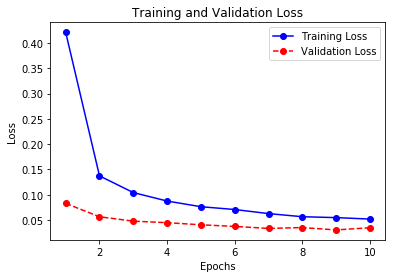

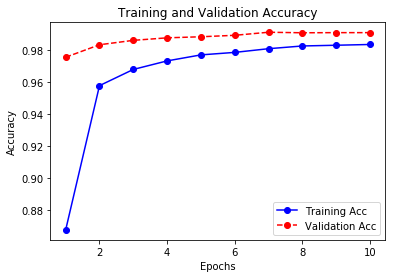

In [5]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
import pandas as pd
# 計算分類的預測值
print("Predicting ...")
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), Y_pred.astype(int), rownames=["label"], colnames=["predict"])
print(tb)

Predicting ...
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        975     0     0     0    0    0    2     1    2    0
1          0  1134     1     0    0    0    0     0    0    0
2          1     0  1026     0    1    0    0     4    0    0
3          0     0     0  1006    0    2    0     0    2    0
4          0     0     0     0  980    0    1     0    0    1
5          2     0     0     7    0  881    1     0    0    1
6          2     2     0     0    1    1  952     0    0    0
7          0     2     6     2    0    0    0  1017    1    0
8          2     2     0     1    0    0    0     2  965    2
9          1     4     0     0    9    5    0     6    4  980


In [14]:
from keras.models import load_model

seed = 7
np.random.seed(seed)

(X_train,Y_train), (X_test,Y_test) = mnist.load_data()
X_test_bk = X_test.copy()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_test = X_test / 255

model = Sequential()
model = load_model("./Python Course/data/mnisthw.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Y_pred = model.predict_classes(X_test) # 分類
Y_probs = model.predict_proba(X_test) # 機率

df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
right = df[Y_test==Y_pred]
df = df[Y_test!=Y_pred] # 篩選出分類錯誤的資料

In [11]:
print(len(df)) # 分類錯誤的資料筆數

84


Index:  1393


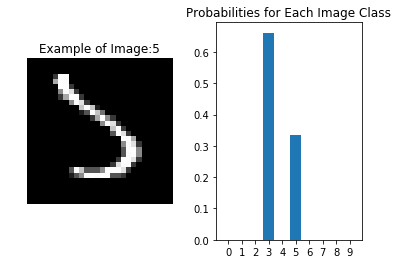

Index:  3767


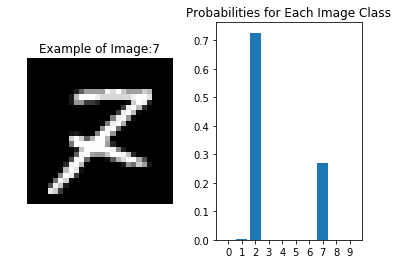

In [8]:
for j in range(2):
    for n in range(1,2):
        i = df.sample(n).index.values.astype(int)[0]
        print("Index: ", i)
        digit = X_test_bk[i].reshape(28, 28)
        # 繪出圖表的預測結果
        plt.figure()
        plt.subplot(1,2,n)
        plt.imshow(digit, cmap="gray")
        plt.title("Example of Image:" + str(Y_test[i]))
        plt.axis("off")

        plt.subplot(1,2,n+1)
        plt.title("Probabilities for Each Image Class")
        plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
        plt.xticks(np.arange(10), np.arange(10).astype(str))

        plt.subplots_adjust(wspace=0.3)
        plt.show()

Index:  7931


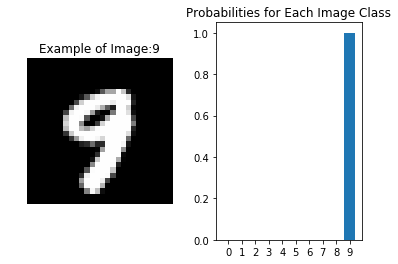

Index:  6797


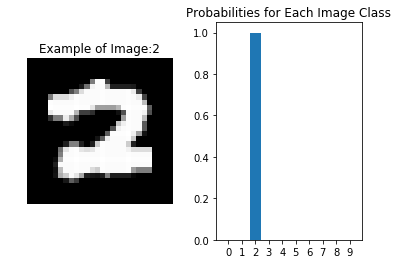

In [15]:
for j in range(2):
    for n in range(1,2):
        i = right.sample(n).index.values.astype(int)[0]
        print("Index: ", i)
        digit = X_test_bk[i].reshape(28, 28)
        # 繪出圖表的預測結果
        plt.figure()
        plt.subplot(1,2,n)
        plt.imshow(digit, cmap="gray")
        plt.title("Example of Image:" + str(Y_test[i]))
        plt.axis("off")

        plt.subplot(1,2,n+1)
        plt.title("Probabilities for Each Image Class")
        plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
        plt.xticks(np.arange(10), np.arange(10).astype(str))

        plt.subplots_adjust(wspace=0.3)
        plt.show()

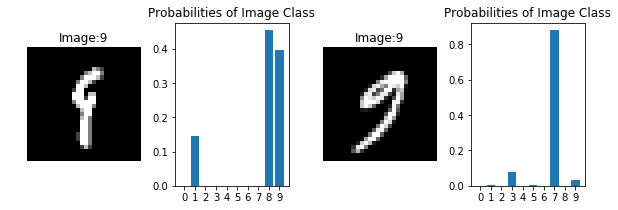

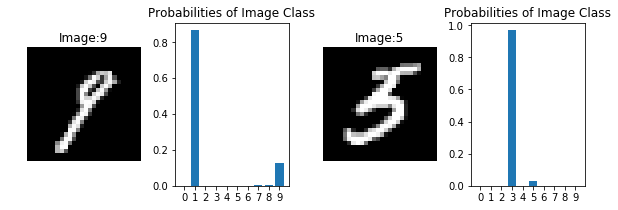

In [9]:
n = 2
for j in range(1,n+1):
    i = df.sample(j).index.values.astype(int)[0]
    r = df.sample(j).index.values.astype(int)[0]
    
    digit = X_test_bk[i].reshape(28, 28)
    digit2 = X_test_bk[r].reshape(28, 28)
    
    plt.figure(figsize=(10,3))
    plt.subplot(141)
    plt.imshow(digit, cmap="gray")
    plt.title("Image:" + str(Y_test[i]))
    plt.axis("off")

    plt.subplot(142)
    plt.title("Probabilities of Image Class")
    plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
    plt.xticks(np.arange(10), np.arange(10).astype(str))
    
    plt.subplot(143)
    plt.imshow(digit2, cmap="gray")
    plt.title("Image:" + str(Y_test[r]))
    plt.axis("off")

    plt.subplot(144)
    plt.title("Probabilities of Image Class")
    plt.bar(np.arange(10), Y_probs[r].reshape(10), align="center")
    plt.xticks(np.arange(10), np.arange(10).astype(str))

    plt.subplots_adjust(wspace=0.3)
    plt.show()